# **Part 1**

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [ ]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
words = ["apple", "war", "river", "king", "city"]

for word in words:
    print(f"\nTop similar words to '{word}':")
    for sim_word, score in model.most_similar(word)[:5]:
        print(f"{sim_word} - {score:.4f}")



Top similar words to 'apple':
apples - 0.7204
pear - 0.6451
fruit - 0.6410
berry - 0.6302
pears - 0.6134

Top similar words to 'war':
wars - 0.7485
War - 0.6411
invasion - 0.5892
Persian_Gulf_War - 0.5891
Vietnam_War - 0.5886

Top similar words to 'river':
creek - 0.7994
lake - 0.7920
rivers - 0.7778
riverbank - 0.7284
canal - 0.7222

Top similar words to 'king':
kings - 0.7138
queen - 0.6511
monarch - 0.6413
crown_prince - 0.6204
prince - 0.6160

Top similar words to 'city':
citys - 0.6804
mayor - 0.6751
town - 0.6724
municipality - 0.6531
municipal - 0.6223


In [ ]:
print("\nAnalogy 1: king - man + woman")
print(model.most_similar(positive=["king", "woman"], negative=["man"], topn=1))

print("\nAnalogy 2: paris - france + italy")
print(model.most_similar(positive=["paris", "italy"], negative=["france"], topn=1))

print("\nAnalogy 3: walking - walk + swim")
print(model.most_similar(positive=["walking", "swim"], negative=["walk"], topn=1))



Analogy 1: king - man + woman
[('queen', 0.7118193507194519)]

Analogy 2: paris - france + italy
[('lohan', 0.5069674849510193)]

Analogy 3: walking - walk + swim
[('swimming', 0.8245975375175476)]


# **Part 2**

In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Download only stopwords
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('/content/IMDB Dataset.csv')

# Setup tokenizer and stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

# Define clean text function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    tokens = tokenizer.tokenize(text.lower())  # Tokenize and lowercase
    filtered = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered)

# Apply cleaning
df['clean_review'] = df['review'].apply(clean_text)

# Preview
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...


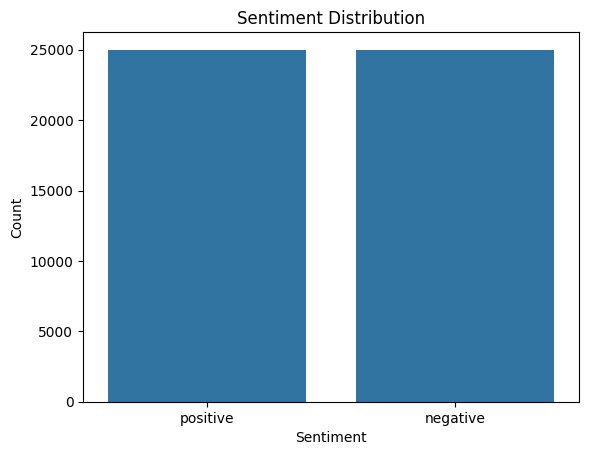

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


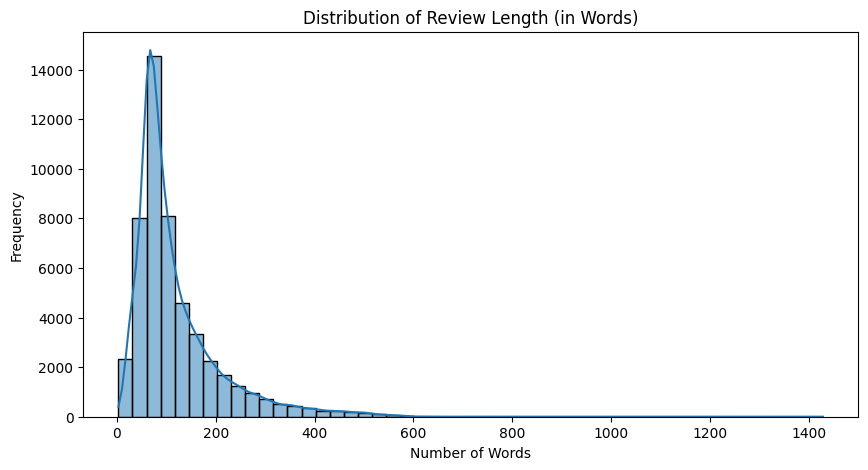

Average review length: 119.57112


In [ ]:
df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Length (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

print("Average review length:", df['review_length'].mean())


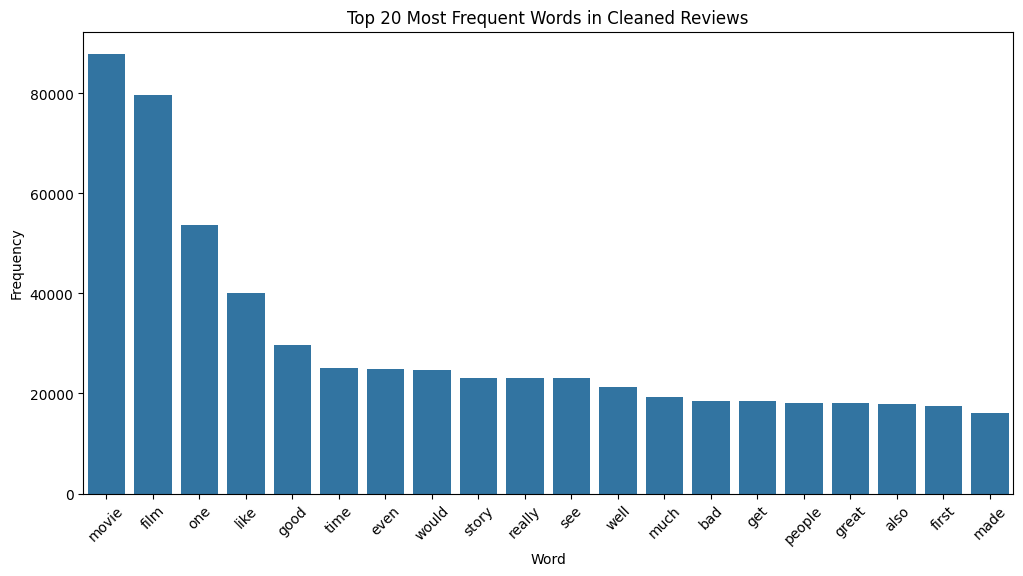

In [ ]:
from collections import Counter

all_words = ' '.join(df['clean_review']).split()
common_words = Counter(all_words).most_common(20)

words, counts = zip(*common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words in Cleaned Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


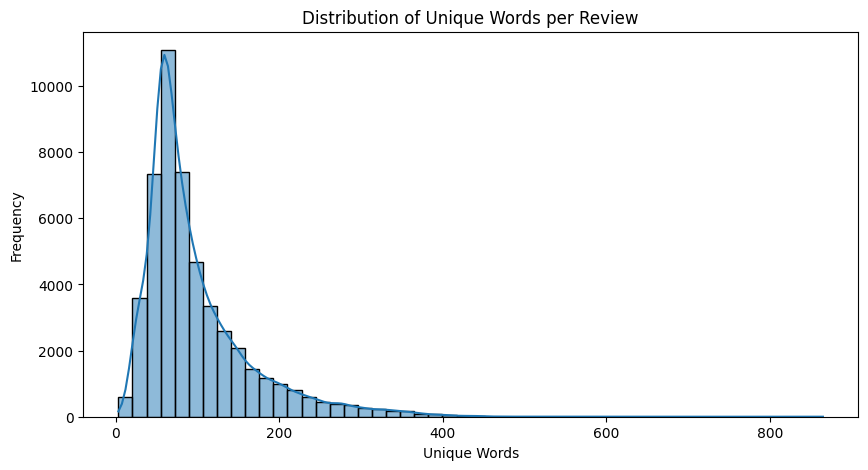

In [ ]:
df['unique_word_count'] = df['clean_review'].apply(lambda x: len(set(x.split())))

plt.figure(figsize=(10, 5))
sns.histplot(df['unique_word_count'], bins=50, kde=True)
plt.title('Distribution of Unique Words per Review')
plt.xlabel('Unique Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df['clean_review']
y = LabelEncoder().fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def get_avg_w2v(text, model, vector_size=300):
    words = text.split()
    vectors = [model[word] for word in words if word in model]
    if not vectors:
        return [0]*vector_size
    return list(np.mean(vectors, axis=0))

import numpy as np
X_train_w2v = np.array([get_avg_w2v(review, model) for review in X_train])
X_test_w2v = np.array([get_avg_w2v(review, model) for review in X_test])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_w2v, y_train)
y_pred = clf.predict(X_test_w2v)

print("Word2Vec Pretrained Accuracy:", accuracy_score(y_test, y_pred))


Word2Vec Pretrained Accuracy: 0.8485


In [ ]:
from gensim.models import Word2Vec

# Tokenize
tokens = [review.split() for review in df['clean_review']]

# Skip-gram
w2v_sg = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=5, sg=1)
# CBOW
w2v_cb = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=5, sg=0)

# Convert to avg vectors
X_train_sg = np.array([get_avg_w2v(review, w2v_sg.wv, 100) for review in X_train])
X_test_sg = np.array([get_avg_w2v(review, w2v_sg.wv, 100) for review in X_test])

X_train_cb = np.array([get_avg_w2v(review, w2v_cb.wv, 100) for review in X_train])
X_test_cb = np.array([get_avg_w2v(review, w2v_cb.wv, 100) for review in X_test])


In [ ]:
for name, Xtr, Xte in [("Skip-gram", X_train_sg, X_test_sg), ("CBOW", X_train_cb, X_test_cb)]:
    clf.fit(Xtr, y_train)
    pred = clf.predict(Xte)
    print(f"{name} Accuracy:", accuracy_score(y_test, pred))


Skip-gram Accuracy: 0.8776
CBOW Accuracy: 0.8641


In [ ]:
from gensim.models import FastText

fasttext_model = FastText(sentences=tokens, vector_size=100, window=5, min_count=5)
X_train_ft = np.array([get_avg_w2v(review, fasttext_model.wv, 100) for review in X_train])
X_test_ft = np.array([get_avg_w2v(review, fasttext_model.wv, 100) for review in X_test])

clf.fit(X_train_ft, y_train)
y_pred_ft = clf.predict(X_test_ft)
print("FastText Accuracy:", accuracy_score(y_test, y_pred_ft))


FastText Accuracy: 0.8484


In [ ]:
results = [
    ["Pretrained Word2Vec", accuracy_score(y_test, y_pred)],
    ["Custom Skip-gram", accuracy_score(y_test, clf.predict(X_test_sg))],
    ["Custom CBOW", accuracy_score(y_test, clf.predict(X_test_cb))],
    ["Custom FastText", accuracy_score(y_test, y_pred_ft)],
]

In [ ]:
df = pd.DataFrame(results)
df.columns = ['Model', 'Accuracy']
df

,Model,Accuracy
0,Pretrained Word2Vec,0.8485
1,Custom Skip-gram,0.5109
2,Custom CBOW,0.4765
3,Custom FastText,0.8484
